# RANDOM TREE CLASSIFIER ALGORITHM

In [1]:
# ALGORITMO - RANDOM TREE CLASSIFIER - MACHINE LEARNING.

# REFERÊNCIAS:
# https://scikit-learn.org/stable/modules/tree.html
# https://en.wikipedia.org/wiki/Decision_tree_learning
# https://sweetcode.io/random-forest-python-sweetcode/
# https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
# https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
   

In [2]:
# import pandas
# PANDAS - DATAFRAMES: two-dimensional labeled data structures with columns of potentially different types.
# Consists of three main components: the data, the index, and the columns.
import pandas as pd

#matplotlib - Matplotlib is a Python 2D plotting library which produces publication quality figures
import matplotlib.pyplot as plt

# Scikit Learn
# Simple and efficient tools for data mining and data analysis Accessible to everybody, and reusable in various contexts
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz

# Imagem
from IPython.display import Image  
import pydotplus


In [3]:
print('pandas:', pd.__version__)
print('sklearn:', sklearn.__version__)

pandas: 0.24.2
sklearn: 0.20.3


In [4]:
# # LIST OF WINE NAMES:

wine_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', \
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315',\
              'Proline']

type(wine_names)

list

In [5]:
# OBS.: PODE CARREDAR DIVERSOS ARQUIVOS E EM VÁRIOS FORMATOS,EXCEL,PDF,WAV,IMAGENS... INCLUSIVE URLS
wine_data = pd.read_csv('./wine.data', names = wine_names) 

df = pd.DataFrame(wine_data)
df.Class = df.Class - 1

#### PANDAS DATA FRAMES, ANÁLISE EXPLORATÓRIA BÁSICA

In [6]:
# from sklearn.model_selection import train_test_split

# # Dividindo os valores em classes
# Y = wine_df.loc[:,'Class'].values
# X = wine_df.loc[:,'Alcohol':'Proline'].values

In [7]:
# Importante conhecer acerca dos dados em que se fará um modelo, bem como a estrutura em que se encontram.
# 80% do tempo de um cientista de dados é trabalhando uma forma de coletar, tratar e otimizar o fluxo do dado,
# FONTE: 

In [8]:
#Entendendo os dados mais de perto - estatística básica, distribuição:
    
print(wine_data.describe())

            Class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     0.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      0.000000   11.030000    0.740000    1.360000          10.600000   
25%      0.000000   12.362500    1.602500    2.210000          17.200000   
50%      1.000000   13.050000    1.865000    2.360000          19.500000   
75%      2.000000   13.677500    3.082500    2.557500          21.500000   
max      2.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000   

In [9]:
# Entendendo os dados mais de perto - tipos de dados


wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                   178 non-null int64
Alcohol                 178 non-null float64
Malic acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity of ash       178 non-null float64
Magnesium               178 non-null int64
Total phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color intensity         178 non-null float64
Hue                     178 non-null float64
OD280/OD315             178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [10]:
# Entendendo os dados mais de perto - conteúdo do arquivo, colunas, ...

wine_data.head(8)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,0,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,0,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,0,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295


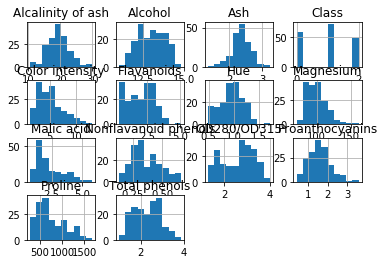

In [11]:
#HISTOGRAMA:
#O histograma, também conhecido como distribuição de frequências.
# A base de cada retângulo representa uma classe. A altura de cada retângulo representa a quantidade 
#ou a frequência absoluta com que o valor da classe ocorre.
#
import seaborn as sns
wine_data.hist()
plt.show()

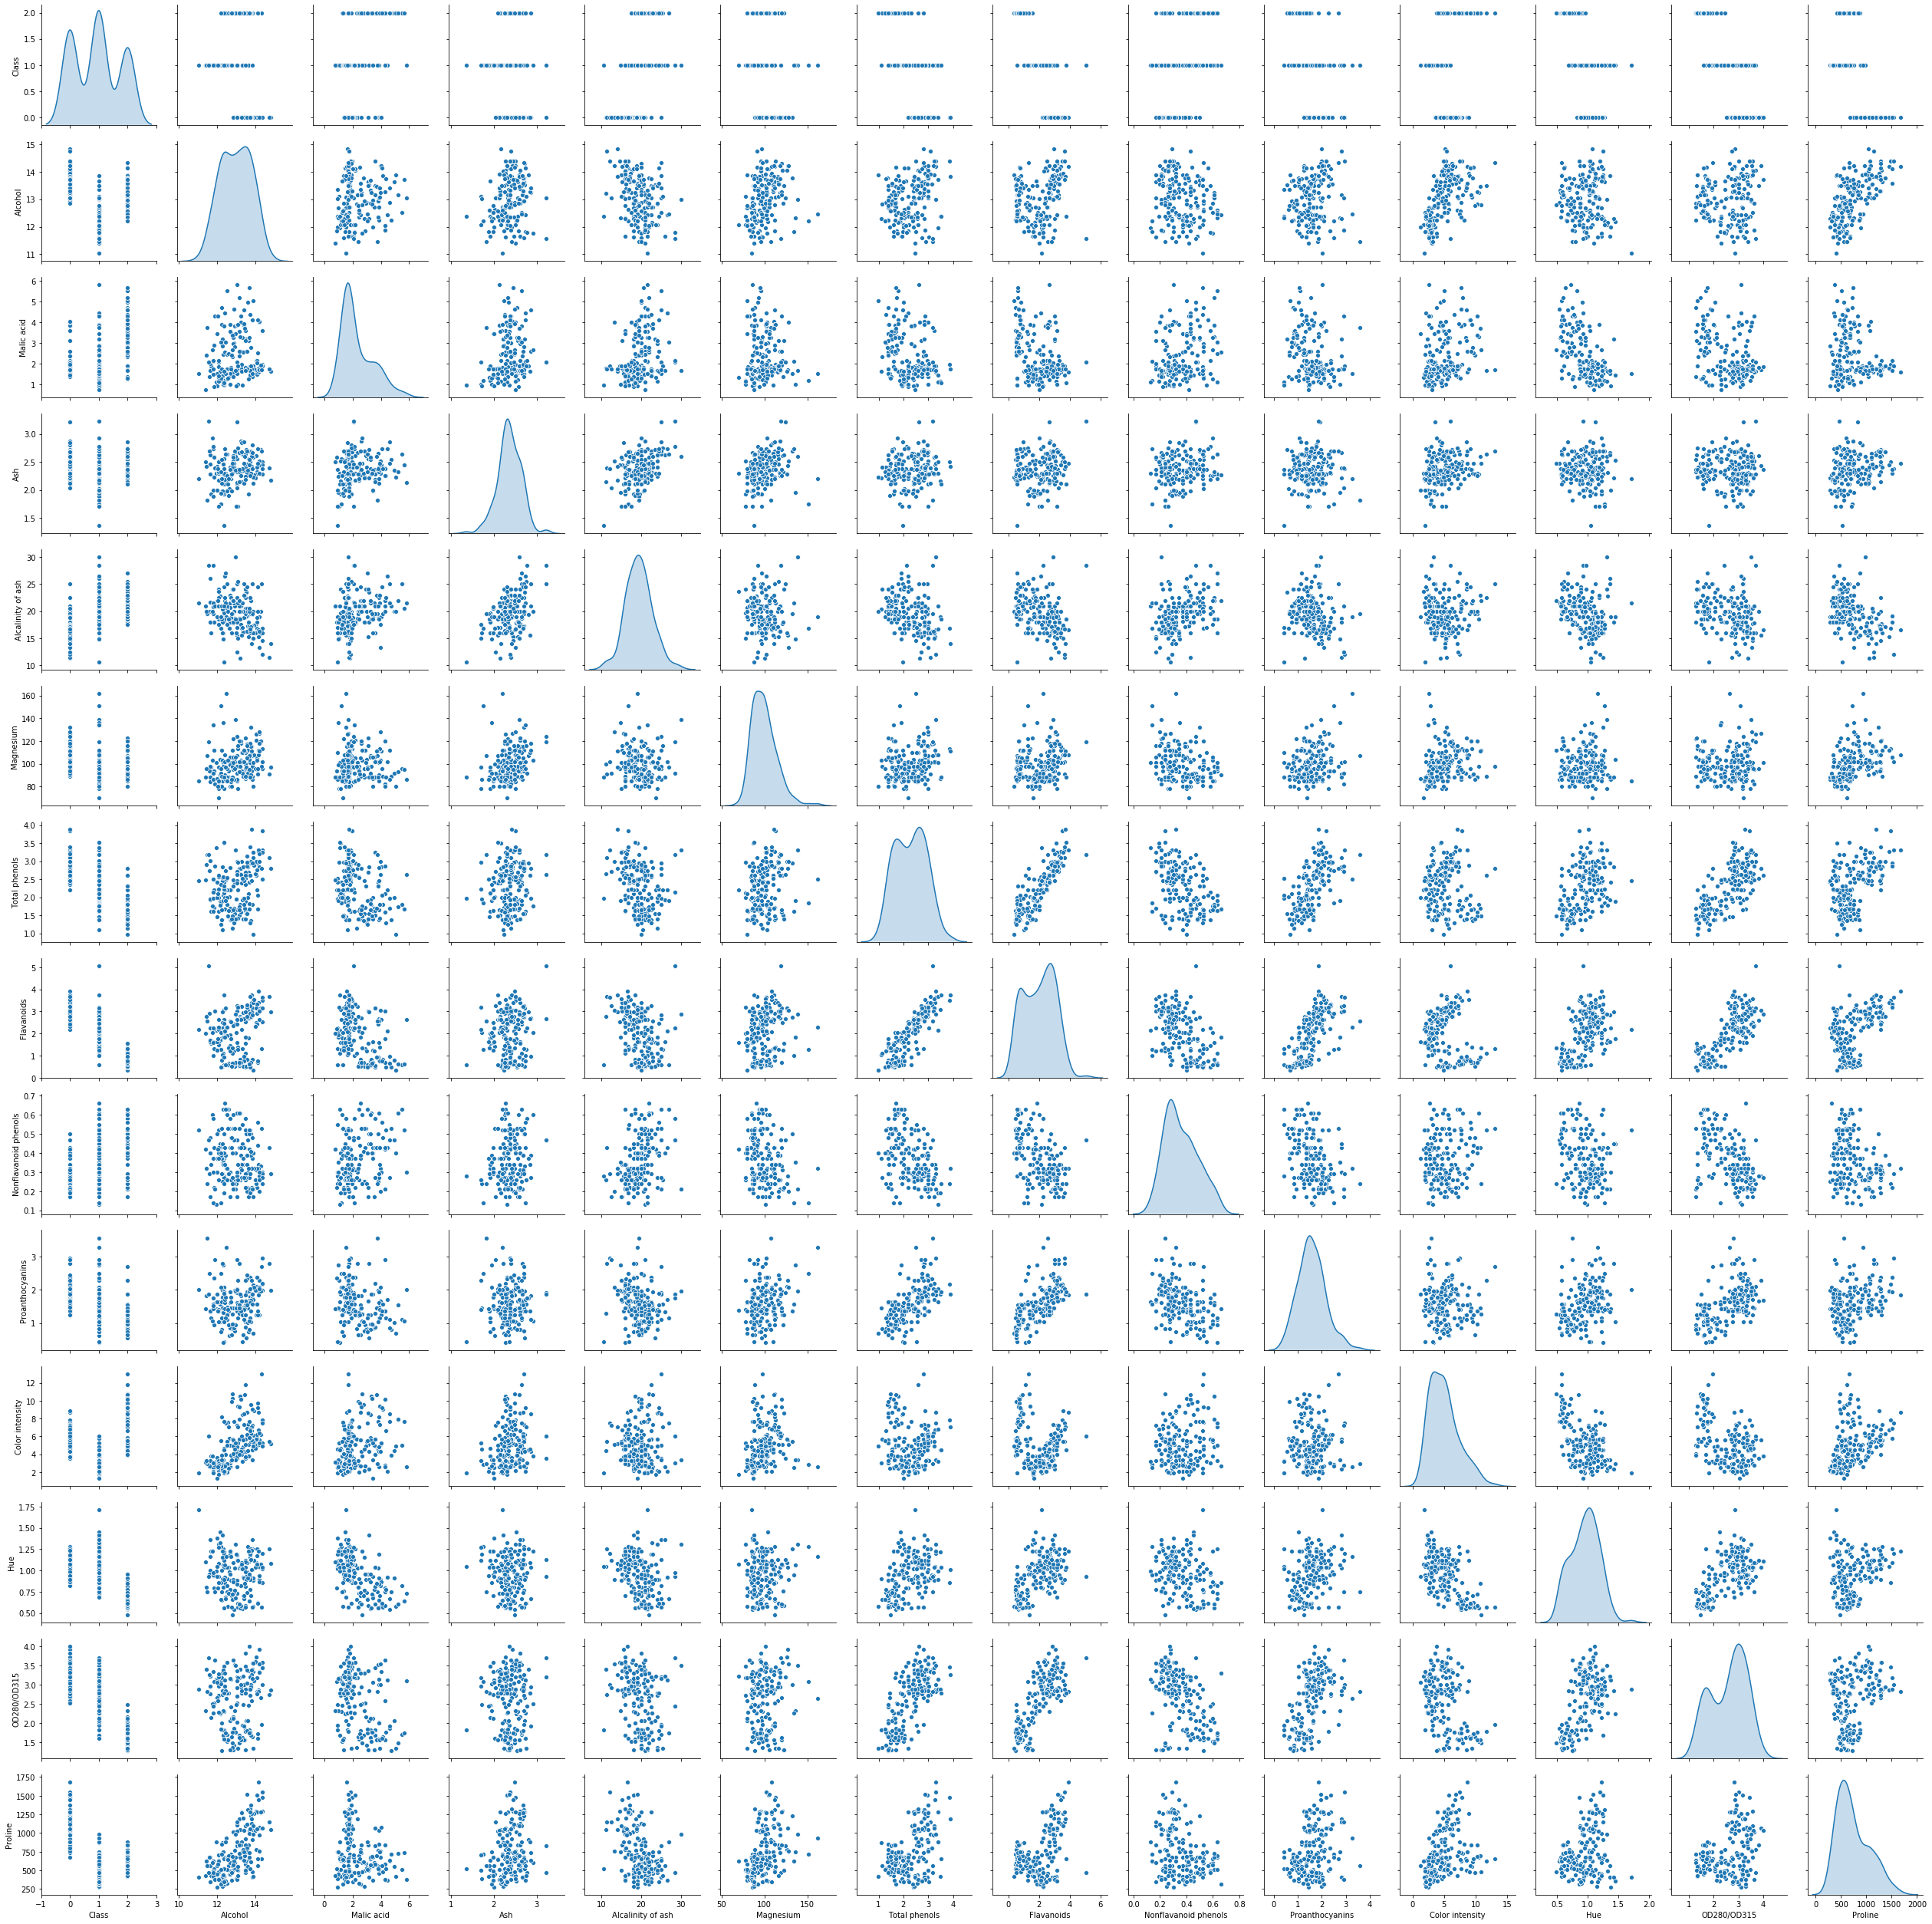

In [12]:
# Pairplot
#This function will create a grid of Axes such that each variable in data 
#will by shared in the y-axis across a single row and in the x-axis across a single 
#column. The diagonal Axes are treated differently, drawing a plot to show the univariate 
#distribution of the data for the variable in that column.
#
sns.pairplot(wine_data, diag_kind="kde")
# plt.rcParams['figure.figsize']=(5,5)
plt.show()

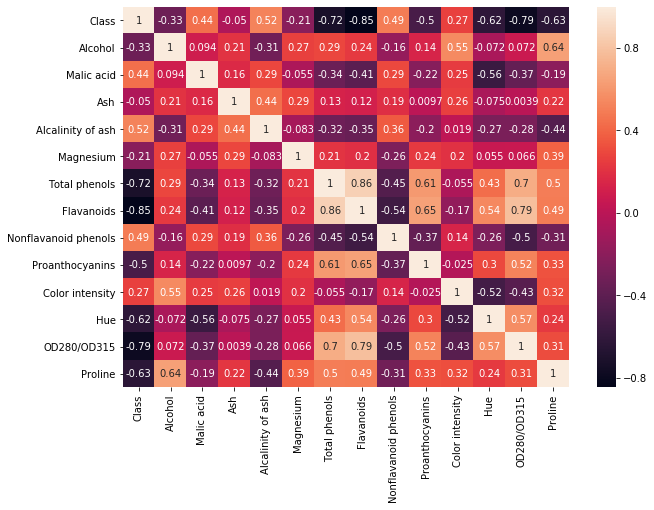

In [13]:
# HEATMAP
#. heatmap shows the relative intensity of a value.
#
plt.figure(figsize=(10,7))
sns.heatmap(wine_data.corr(), annot=True)
plt.show()

### Data: Train, Test, Split

In [14]:
from sklearn.model_selection import train_test_split

# Dividindo os valores em classes
Y = wine_data.loc[:,'Class'].values
X = wine_data.loc[:,'Alcohol':'Proline'].values

# Dividimos o dataset entre testes e treinamento:
# Testes: 30%
# Treinamento do algoritmo: 70%
#
train_x, test_x, train_y, test_y = train_test_split(X,Y , test_size=0.3, random_state=10)

In [15]:
# importar biblioteca do algoritmo DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier

# Treinando o modelo com os dados de teste, equivalentes a 30% do Dataset original:
# dtree = DecisionTreeClassifier(presort=True)

dtree = DecisionTreeClassifier()
dtree.fit(train_x, train_y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

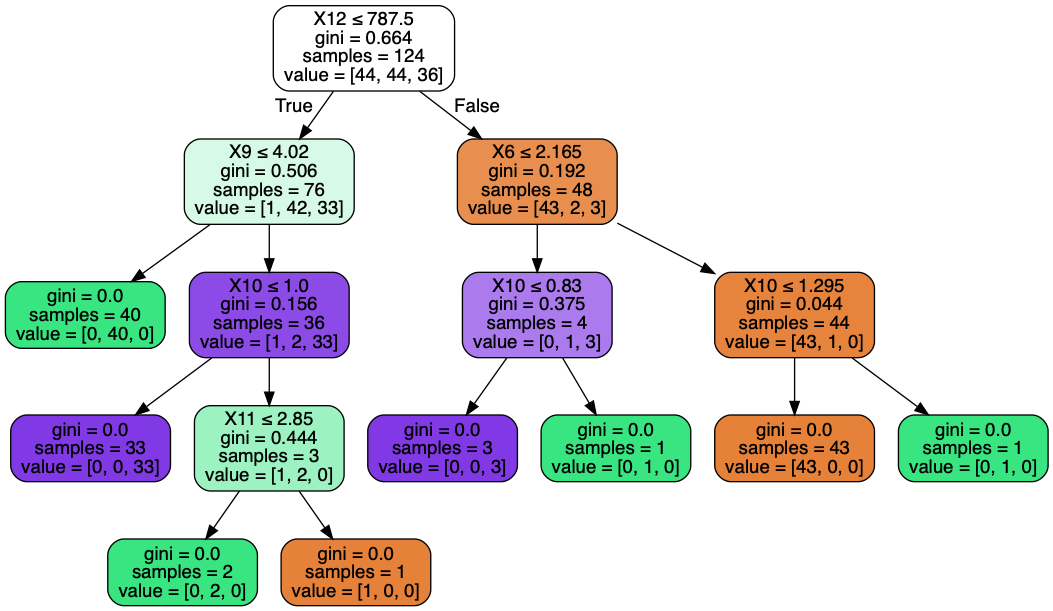

In [16]:
# PydotPlus - Criando a árvore de decisão para análise - DecisionTreeClassifier
#
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



#### Test score:

In [17]:
# Qual o score da análise realizada - DecisionTreeClassifier
#
test_score = dtree.score(test_x, test_y)
print(test_score, '-->', round(test_score * 100,2), '%')


0.8148148148148148 --> 81.48 %


# RANDOM FOREST CLASSIFIER ALGORITHM

In [18]:
# superficial answer is that Random Forest (RF) is a collection of Decision Trees (DT).
# The point of RF is to prevent overfitting. It does this by creating random subsets of the features 
# and building smaller (shallow) trees using the subsets and then it combines the subtrees.


In [19]:
# from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=100, max_depth=3, max_features = 'sqrt')
RF_clf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Test score:

In [20]:
# Qual o score da análise realizada - RandomForestClassifier
#
test_score = RF_clf.score(test_x, test_y)
print(test_score, '-->', round(test_score * 100,2), '%')

0.9444444444444444 --> 94.44 %


### A parte mais dificil não é fazer funcionar, e sim a relevância da informação encontrada.

### "You can have the best model in the world, 
### if you put garbage data in, 
### you will get garbage accuracy, on the other hand, 
### you can use pretty simple 
### (by simple I mean no assembling) 
### model like a simple random forest and get very high accuracy."
